In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
import pickle


In [13]:
# Load dataset
df = pd.read_csv('Datasets/Expanded_Resume_Screening.csv')

# Drop unnecessary columns
df = df.drop(columns=['Resume_ID', 'Name'])

# Display basic info
display(df.head())
print(df.info())
print(df.isnull().sum())


,Skills,Experience (Years),Education,Certifications,Job Role,Recruiter Decision,Salary Expectation ($),Projects Count,AI Score (0-100)
0,"TensorFlow, NLP, Pytorch",10,B.Sc,NaN,AI Researcher,Hire,104895,8,100
1,"Deep Learning, Machine Learning, Python, SQL",10,MBA,Google ML,Data Scientist,Hire,113002,1,100
2,"Ethical Hacking, Cybersecurity, Linux",1,MBA,Deep Learning Specialization,Cybersecurity Analyst,Hire,71766,7,70
3,"Python, Pytorch, TensorFlow",7,B.Tech,AWS Certified,AI Researcher,Hire,46848,0,95
4,"SQL, React, Java",4,PhD,NaN,Software Engineer,Hire,87441,9,100


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Skills                  51000 non-null  object
 1   Experience (Years)      51000 non-null  int64 
 2   Education               51000 non-null  object
 3   Certifications          36920 non-null  object
 4   Job Role                51000 non-null  object
 5   Recruiter Decision      51000 non-null  object
 6   Salary Expectation ($)  51000 non-null  int64 
 7   Projects Count          51000 non-null  int64 
 8   AI Score (0-100)        51000 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 3.5+ MB
None
Skills                        0
Experience (Years)            0
Education                     0
Certifications            14080
Job Role                      0
Recruiter Decision            0
Salary Expectation ($)        0
Projects Count                0
AI Score 

In [14]:
# Splitting 'Skills' column into Skill1, Skill2, Skill3
df[['Skill1', 'Skill2', 'Skill3']] = df['Skills'].str.split(', ', expand=True).iloc[:, :3]
df = df.drop(columns=['Skills'])
display(df.head())


,Experience (Years),Education,Certifications,Job Role,Recruiter Decision,Salary Expectation ($),Projects Count,AI Score (0-100),Skill1,Skill2,Skill3
0,10,B.Sc,NaN,AI Researcher,Hire,104895,8,100,TensorFlow,NLP,Pytorch
1,10,MBA,Google ML,Data Scientist,Hire,113002,1,100,Deep Learning,Machine Learning,Python
2,1,MBA,Deep Learning Specialization,Cybersecurity Analyst,Hire,71766,7,70,Ethical Hacking,Cybersecurity,Linux
3,7,B.Tech,AWS Certified,AI Researcher,Hire,46848,0,95,Python,Pytorch,TensorFlow
4,4,PhD,NaN,Software Engineer,Hire,87441,9,100,SQL,React,Java


/tmp/ipykernel_16641/1779682330.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Recruiter Decision', data=df, palette='coolwarm')


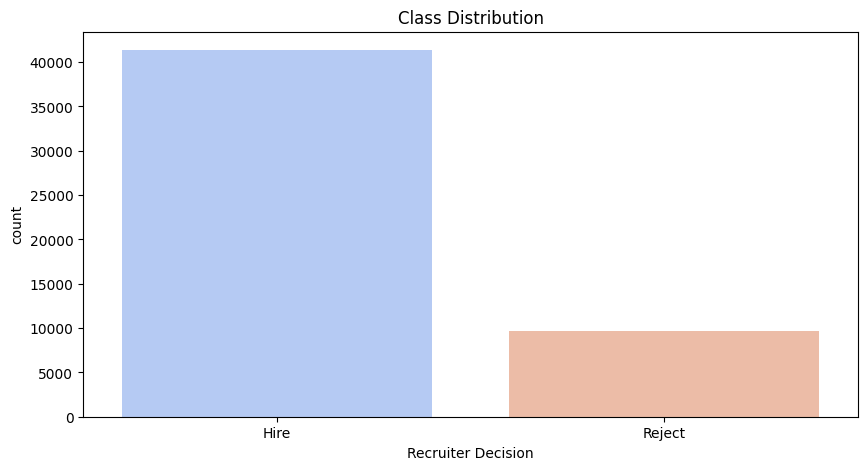

In [15]:
# EDA - Visualizing distributions
plt.figure(figsize=(10, 5))
sns.countplot(x='Recruiter Decision', data=df, palette='coolwarm')
plt.title('Class Distribution')
plt.show()


In [16]:
# Encoding categorical variables
label_encoders = {}
categorical_columns = ['Education', 'Certifications', 'Job Role', 'Skill1', 'Skill2', 'Skill3']
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [17]:
# Scaling numerical features
scaler = StandardScaler()
numerical_columns = ['Experience (Years)', 'Salary Expectation ($)', 'Projects Count', 'AI Score (0-100)']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


In [18]:
# Convert 'Recruiter Decision' to numerical labels
df['Recruiter Decision'] = df['Recruiter Decision'].map({'Hire': 1, 'Reject': 0})


In [19]:
# Splitting dataset
X = df.drop(columns=['Recruiter Decision'])
y = df['Recruiter Decision']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
X.columns

Index(['Experience (Years)', 'Education', 'Certifications', 'Job Role',
       'Salary Expectation ($)', 'Projects Count', 'AI Score (0-100)',
       'Skill1', 'Skill2', 'Skill3'],
      dtype='object')

In [20]:
# Model Selection
models = {
    'RandomForest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0)
}

best_model = None
best_acc = 0
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {acc:.4f}')
    if acc > best_acc:
        best_acc = acc
        best_model = model


RandomForest Accuracy: 0.8091
XGBoost Accuracy: 0.8063
CatBoost Accuracy: 0.8089


In [21]:
# Display best model results
print("Best Model:", best_model)
print(classification_report(y_test, best_model.predict(X_test)))


Best Model: RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.52      0.01      0.01      1948
           1       0.81      1.00      0.89      8252

    accuracy                           0.81     10200
   macro avg       0.67      0.50      0.45     10200
weighted avg       0.75      0.81      0.73     10200



In [22]:
# Save the best model
with open('model/best_resume_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)
